<a href="https://colab.research.google.com/github/AhmedCoolProjects/ML/blob/main/AgglomerativeHierarchicalClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hierarchical Clustering: hierarchy of clusters where each node is a cluster consists of its daughter nodes(clusters).
divisive & agglomerative. 
* agglomerative: merging clusters.
we use Dendrogram wher y represents the similarity between the 2 clusters.
* we can specify a level of smiliraty to get our clusters.
1. creating n clusters for each data point.
2. compute the proximity matrix (n,n).
3. Repeat.(merge the 2 closest clusters + update the proximity matrix (n-1,n-1).
4. Stop until having only a single cluster remains or the specified number of clusters.

> Using Euclidien distance between data points.

> **between clusters:**
* Single-Linkage Clustering: min dis between clusters.
* Complete-Linkage Clustering: max dis between clusters.
* Average Linkage Clustering: avg dis between clusters.
* Centroid Linkage Clustering: dis between clusters centroids.

* No deed to specify the number of clusters.
* easy to implement.
* useful dendrogram.
* very large computation time.
* no undo.


# Agglomerative Hierarchical Clustering
## Random data

In [94]:
import numpy as np
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold,datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

In [95]:
# generating random data.
X,Y = make_blobs(n_samples=50,centers=[[4,4], [-2, -1], [1, 1], [10,4]],cluster_std=0.9)
X[:5]

array([[-2.36750527, -1.33890792],
       [-1.37577882, -0.05073733],
       [12.76814672,  4.93338734],
       [ 2.14390085,  1.59121554],
       [-1.67254845, -0.58505846]])

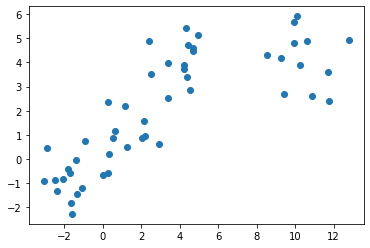

In [96]:
# visualization
plt.scatter(X[:,0],X[:,1],marker="o")
plt.show()

In [97]:
# building the model
_n_clusters = 4 # the number of clusters to form
_linkage = 'average'
agglo = AgglomerativeClustering(n_clusters=_n_clusters,linkage=_linkage)
agglo.fit(X,Y)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4)

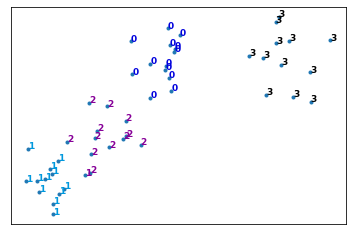

In [98]:
# plotting
plt.figure(figsize=(6,4))
# normalizing
x_min , x_max = np.min(X,axis=0),np.max(X,axis=0)
X = (X - x_min) / (x_max - x_min)
for i in range(X.shape[0]):
  plt.text(X[i,0],X[i,1],str(Y[i]),
           color=plt.cm.nipy_spectral(agglo.labels_[i] / 10),
           fontdict={'weight':'bold','size':9})
plt.xticks([])
plt.yticks([])
plt.scatter(X[:,0],X[:,1],marker=".")
plt.show()

In [99]:
dist_matrix = distance_matrix(X,X)
print(dist_matrix)

[[0.         0.16954913 1.22722362 ... 0.19401999 0.06682131 0.40182155]
 [0.16954913 0.         1.08303404 ... 0.12318353 0.16832019 0.25642437]
 [1.22722362 1.08303404 0.         ... 1.03621939 1.18352517 0.82821825]
 ...
 [0.19401999 0.12318353 1.03621939 ... 0.         0.14787749 0.21998561]
 [0.06682131 0.16832019 1.18352517 ... 0.14787749 0.         0.36607695]
 [0.40182155 0.25642437 0.82821825 ... 0.21998561 0.36607695 0.        ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


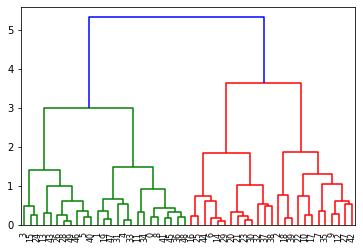

In [100]:
Z = hierarchy.linkage(dist_matrix,'complete')
dendro = hierarchy.dendrogram(Z)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


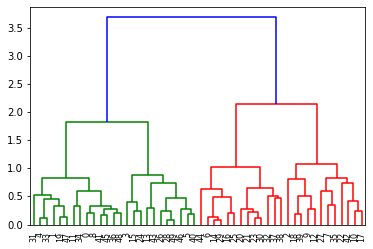

In [101]:
Z = hierarchy.linkage(dist_matrix,'average')
dendro = hierarchy.dendrogram(Z)

# Agglomerative Hierarchical Clustering
## Clustering Vehicles.

In [102]:
# downloading the data.
!wget -O cars_clus.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/cars_clus.csv

--2021-07-11 23:13:11--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/cars_clus.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17774 (17K) [text/csv]
Saving to: ‘cars_clus.csv’

cars_clus.csv       100%[===================>]  17.36K  --.-KB/s    in 0s      

2021-07-11 23:13:11 (176 MB/s) - ‘cars_clus.csv’ saved [17774/17774]



In [103]:
import pandas as pd
df = pd.read_csv('/content/cars_clus.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   157 non-null    object 
 1   model      159 non-null    object 
 2   sales      159 non-null    object 
 3   resale     159 non-null    object 
 4   type       159 non-null    object 
 5   price      159 non-null    object 
 6   engine_s   159 non-null    object 
 7   horsepow   159 non-null    object 
 8   wheelbas   159 non-null    object 
 9   width      159 non-null    object 
 10  length     159 non-null    object 
 11  curb_wgt   159 non-null    object 
 12  fuel_cap   159 non-null    object 
 13  mpg        159 non-null    object 
 14  lnsales    159 non-null    object 
 15  partition  159 non-null    float64
dtypes: float64(1), object(15)
memory usage: 20.0+ KB


In [104]:
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [105]:
# cleaning data.
df_ = df.drop('manufact',axis=1)
df_.drop('model',inplace=True,axis=1)
df_ = df_.apply(pd.to_numeric,errors="coerce")

In [106]:
df_.dropna(inplace=True)

In [107]:
df_.reset_index(drop=True,inplace=True)

In [108]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sales      117 non-null    float64
 1   resale     117 non-null    float64
 2   type       117 non-null    float64
 3   price      117 non-null    float64
 4   engine_s   117 non-null    float64
 5   horsepow   117 non-null    float64
 6   wheelbas   117 non-null    float64
 7   width      117 non-null    float64
 8   length     117 non-null    float64
 9   curb_wgt   117 non-null    float64
 10  fuel_cap   117 non-null    float64
 11  mpg        117 non-null    float64
 12  lnsales    117 non-null    float64
 13  partition  117 non-null    float64
dtypes: float64(14)
memory usage: 12.9 KB


In [109]:
# selecting our features
x_df = df_[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

In [110]:
x_df.head()

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
3,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
4,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0


In [111]:
# normalizing
from sklearn.preprocessing import MinMaxScaler
x_data = x_df.values
min_max_scaler = MinMaxScaler()
x_data = min_max_scaler.fit_transform(x_data)
x_data[:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

In [112]:
# clustering using scipy
import scipy
# creating the distance matrix
x_data_size = x_data.shape[0]
dist_matrix_scipy = scipy.zeros([x_data_size,x_data_size])
for i in range(x_data_size):
  for j in range(x_data_size):
    dist_matrix_scipy[i,j] = scipy.spatial.distance.euclidean(x_data[i],x_data[j])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  """


In [113]:
dist_matrix_scipy.shape

(117, 117)

In [114]:
# linkage and upadating the distance matrix
import pylab
Z = hierarchy.linkage(dist_matrix_scipy,'complete')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


In [115]:
# using cutting line to specify max of distance 
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z,max_d,criterion='distance')
clusters

array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

In [116]:
# specifying the max of clusters directly
k = 5
clusters = fcluster(Z,k,criterion='maxclust')
clusters

array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

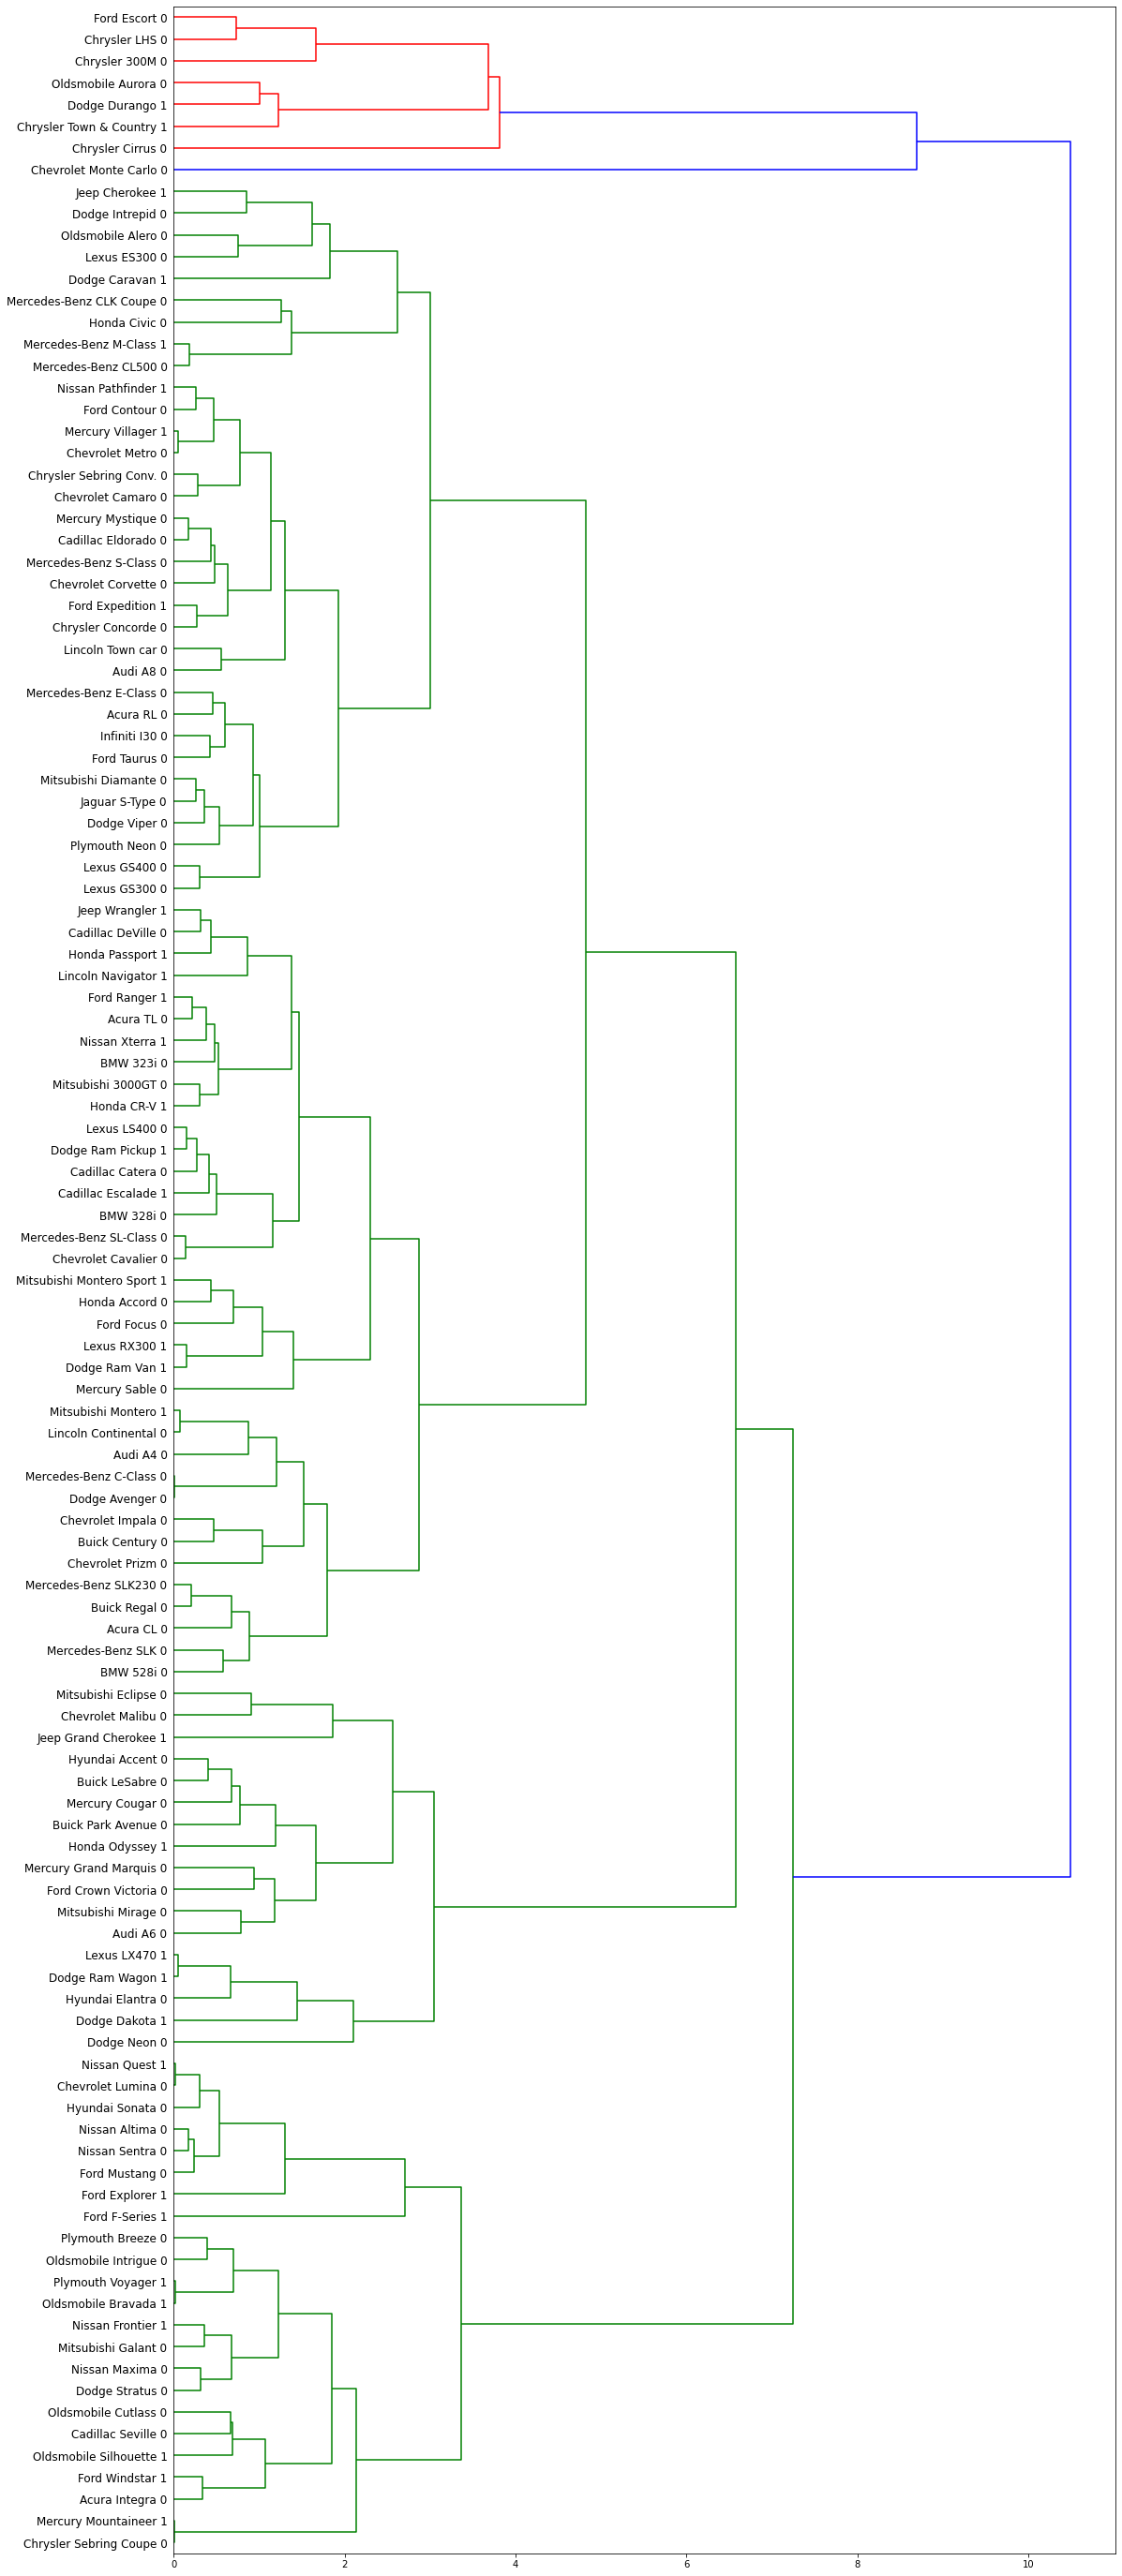

In [117]:
# plotting dendrogram
fig = pylab.figure(figsize=(18,50))
def llf(id):
  return '%s %s %s' %(df['manufact'][id],df['model'][id],int(float(df['type'][id])))
dendro = hierarchy.dendrogram(Z,leaf_label_func=llf,leaf_rotation=0,leaf_font_size=12,orientation='right')
plt.show()

In [118]:
# using scikit-learn
dist_matrix_sklearn = distance_matrix(x_data,x_data)
dist_matrix_sklearn.shape

(117, 117)

In [119]:
agglom = AgglomerativeClustering(n_clusters=6,linkage='complete')
agglom.fit(x_data)
agglom.labels_

array([1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 5, 1,
       4, 1, 1, 2, 1, 2, 1, 1, 1, 5, 0, 0, 0, 3, 2, 1, 2, 1, 2, 3, 2, 3,
       0, 3, 0, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 3, 2, 3, 1, 2, 3, 5, 1, 1, 2, 3, 2, 1, 3,
       2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1])

In [120]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sales      117 non-null    float64
 1   resale     117 non-null    float64
 2   type       117 non-null    float64
 3   price      117 non-null    float64
 4   engine_s   117 non-null    float64
 5   horsepow   117 non-null    float64
 6   wheelbas   117 non-null    float64
 7   width      117 non-null    float64
 8   length     117 non-null    float64
 9   curb_wgt   117 non-null    float64
 10  fuel_cap   117 non-null    float64
 11  mpg        117 non-null    float64
 12  lnsales    117 non-null    float64
 13  partition  117 non-null    float64
dtypes: float64(14)
memory usage: 12.9 KB


In [121]:
df_['cluster_'] = agglom.labels_

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

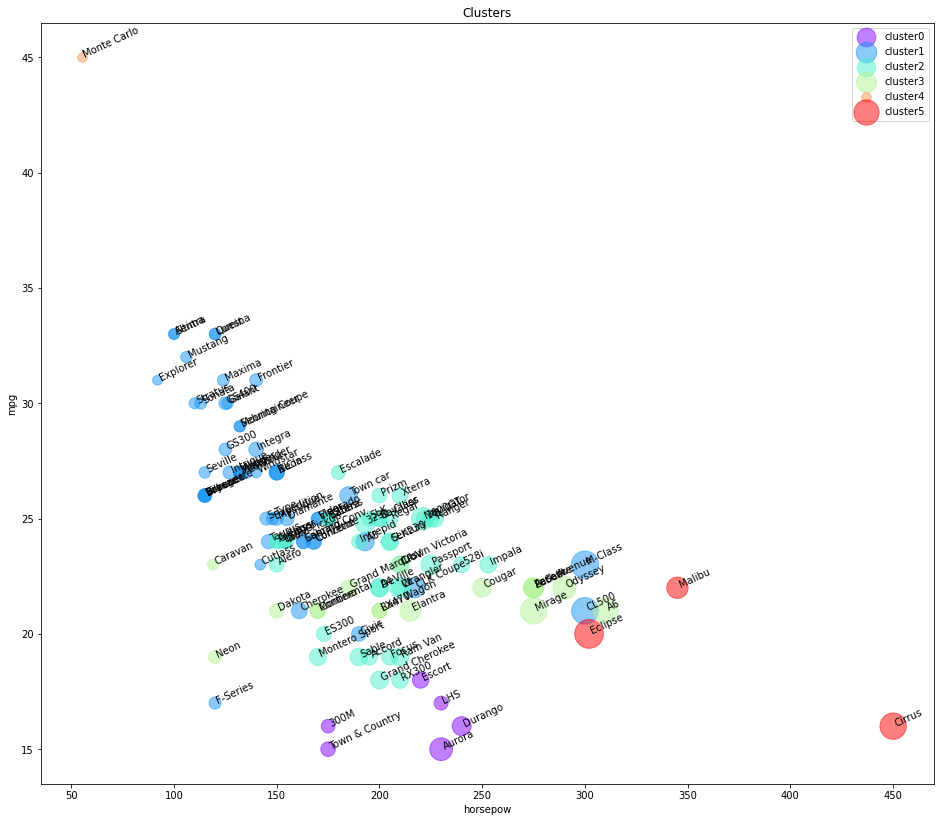

In [122]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0,1,n_clusters))
cluster_labels = list(range(0,n_clusters))
plt.figure(figsize=(16,14))
for color , label in zip(colors,cluster_labels):
  subset = df_[df_.cluster_ == label]
  for i in subset.index:
    plt.text(subset.horsepow[i],subset.mpg[i],str(df['model'][i]),rotation=25)
  plt.scatter(subset.horsepow,subset.mpg,s=subset.price*10,c=color,label='cluster'+str(label),alpha=0.5)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')
plt.show()

In [123]:
df_.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         1.0      6
1         0.0     47
          1.0      5
2         0.0     27
          1.0     11
3         0.0     10
          1.0      7
4         0.0      1
5         0.0      3
Name: cluster_, dtype: int64

In [124]:
agg_cars = df_.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [125]:
agg_cars

horsepow  engine_s        mpg      price
cluster_ type                                            
0        1.0   211.666667  4.483333  16.166667  29.024667
1        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   145.000000  2.580000  22.200000  17.009200
2        0.0   203.111111  3.303704  24.214815  27.750593
         1.0   182.090909  3.345455  20.181818  26.265364
3        0.0   256.500000  4.410000  21.500000  42.870400
         1.0   160.571429  3.071429  21.428571  21.527714
4        0.0    55.000000  1.000000  45.000000   9.235000
5        0.0   365.666667  6.233333  19.333333  66.010000

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

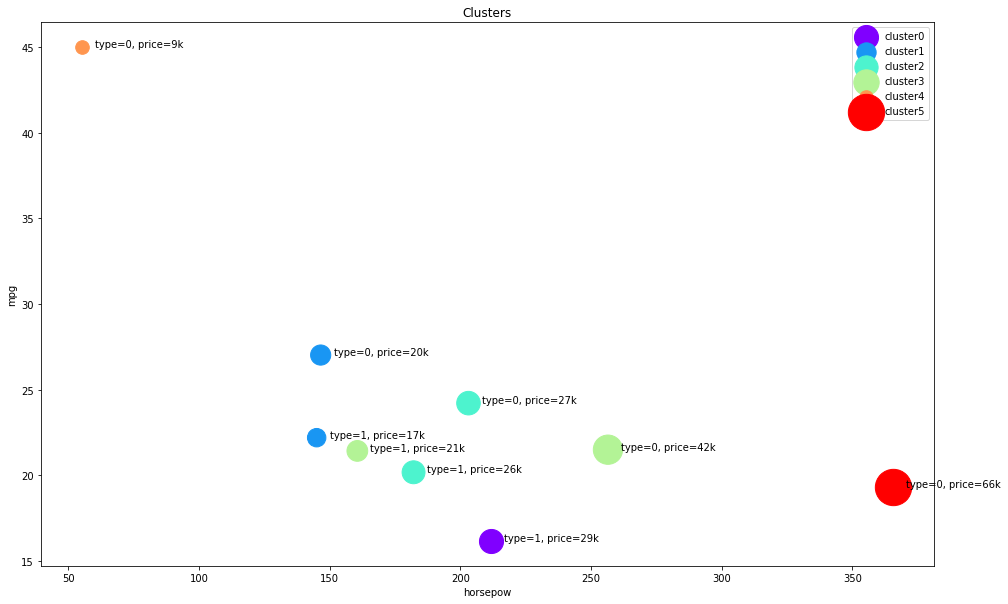

In [126]:
plt.figure(figsize=(16,10))
for color,label in zip(colors,cluster_labels):
  subset = agg_cars.loc[(label,),]
  for i in subset.index:
    plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')
plt.show()